# **Bibliotecas

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from copy import deepcopy as cp
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    RocCurveDisplay
)

warnings.filterwarnings("ignore")
sns.set_style("ticks")
sns.set_context("paper")

    Para as questões 2-5 usaremos apenas os vinhos do tipo "branco".
2 - Faça o download da base - esta é uma base real, apresentada no artigo:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

Ela possui uma variável denominada "quality", uma nota de 0 a 10 que denota a qualidade do vinho. Crie uma nova variável, chamada "opinion" que será uma variável categórica igual à 0, quando quality for menor e igual à 5. O valor será 1, caso contrário. Desconsidere a variável quality para o restante da análise.

In [231]:
df = pd.read_csv('Dados/winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [232]:
df_white = df[df.type=="white"].copy().drop(columns= "type")
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [233]:
df_white.shape

(4898, 12)

In [234]:
df_white['opinion'] = (df_white['quality'] > 5).astype(int)
df_white.drop(columns='quality', inplace=True)

In [235]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,NaN,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


3 - Descreva as variáveis presentes na base. Quais são as variáveis? Quais são os tipos de variáveis (discreta, categórica, contínua)? Quais são as médias e desvios padrões?


In [236]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4890 non-null   float64
 1   volatile acidity      4891 non-null   float64
 2   citric acid           4896 non-null   float64
 3   residual sugar        4896 non-null   float64
 4   chlorides             4896 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4891 non-null   float64
 9   sulphates             4896 non-null   float64
 10  alcohol               4898 non-null   float64
 11  opinion               4898 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 478.3 KB


In [237]:
df_white = df_white.drop_duplicates().reset_index(drop=True)

In [238]:
# Existem dados nulos no Data|Frame que devem ser excluidos, por falta de informações do negocios, 
#não vou tentar imputar média, mediana ou qualquer outro artifico para preenchimento dos dados nulos. 

df_white = df_white.dropna()
df_white = df_white.reset_index(drop=True)

In [239]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3937,5.7,0.21,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,1
3938,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
3939,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
3940,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [240]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
count,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000
mean,6.840297,0.280430,0.334490,5.918721,0.045887,34.918062,137.215753,0.993788,3.195287,0.490236,10.591945,0.659817
std,0.866067,0.103256,0.122404,4.861389,0.023088,17.227540,43.128509,0.002907,0.151345,0.113653,1.217787,0.473831
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991600,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,1.000000
75%,7.300000,0.328750,0.390000,8.875000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


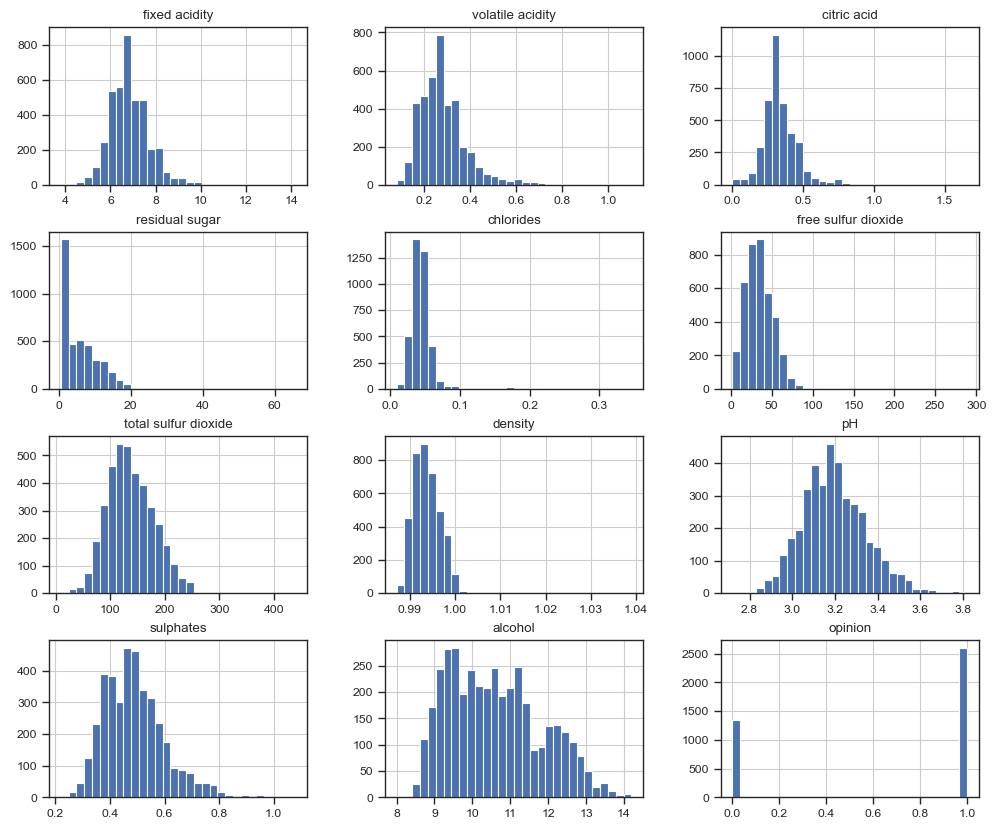

In [241]:
df_white.hist(figsize=(12,10),bins=30);

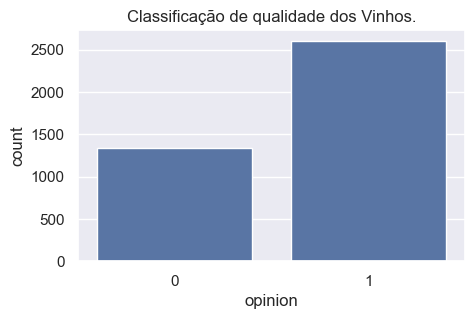

In [242]:
plt.figure(figsize=(5,3))
sns.set(font_scale = 1)
plt.title('Classificação de qualidade dos Vinhos.')
sns.countplot(x=(df_white['opinion']));

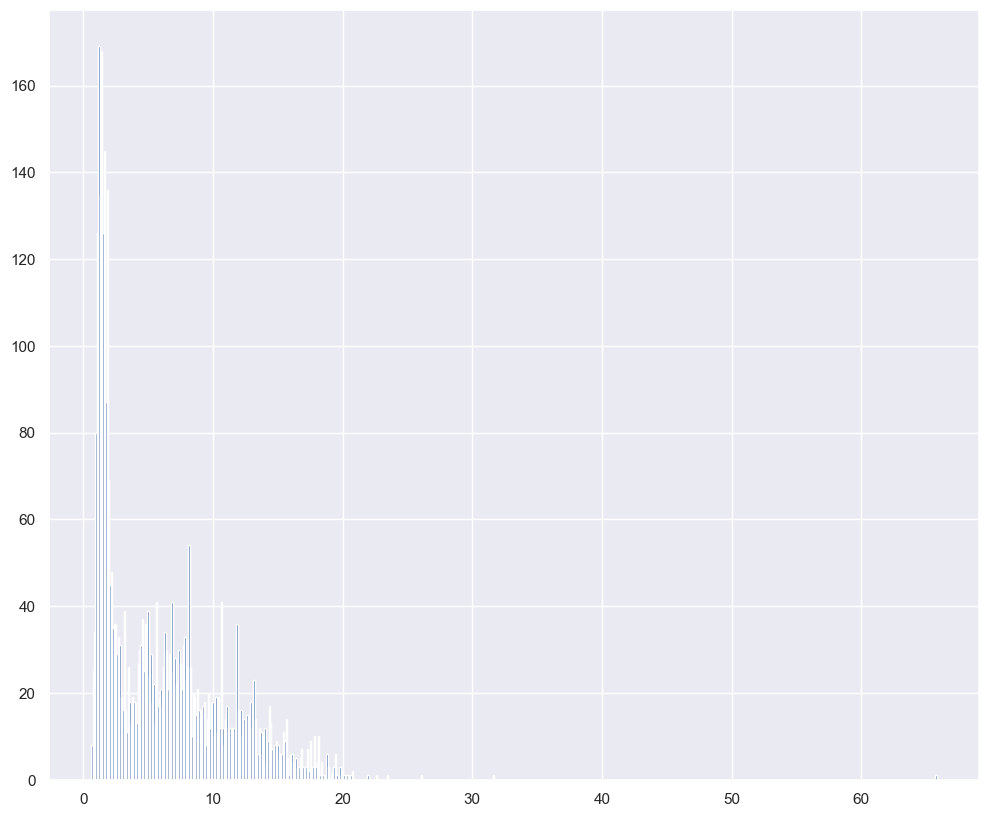

In [243]:
df_white['residual sugar'].hist(figsize=(12,10),bins=600);

#### A presença de Outliers pode afetar o valor da média devido à sensibilidade dessa medida estatistica a valores extremos. A média é calculada somando todos os valores e dividindo pelo numeros de observações. Quando há outliers no conjunto de dados, esses valores extremos podem ter impacto significativo na soma total e, consequentemente na média. 
#### Em contraste, medidas estatísticas robustas, como a mediana e o intervalo interquartil (IQR), são menos afetadas por outliers. A mediana é o valor central de um conjunto de dados ordenado, e o IQR é baseado nos quartis, que dividem os dados em partes iguais. Essas medidas são mais robustas porque não dependem diretamente de cada valor individual, tornando-as menos suscetíveis a influências de outliers. Portanto, em análises de dados, é comum considerar não apenas a média, mas também medidas mais robustas, especialmente quando outliers podem estar presentes

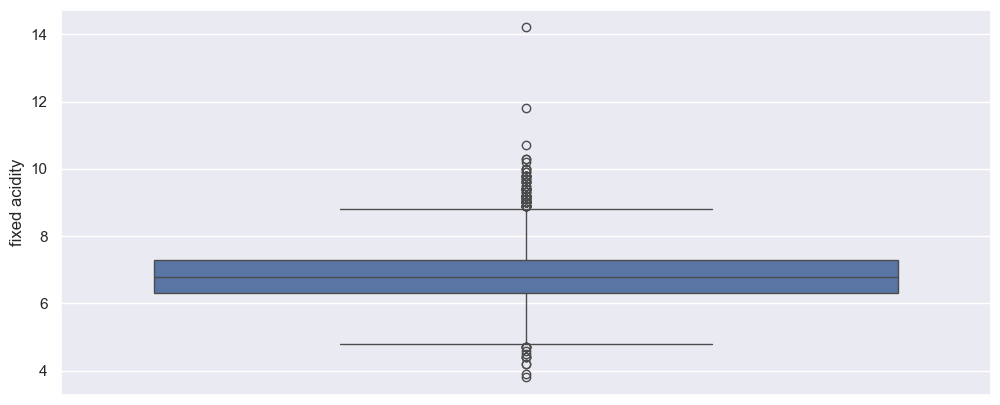

In [244]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['fixed acidity'])
plt.show()

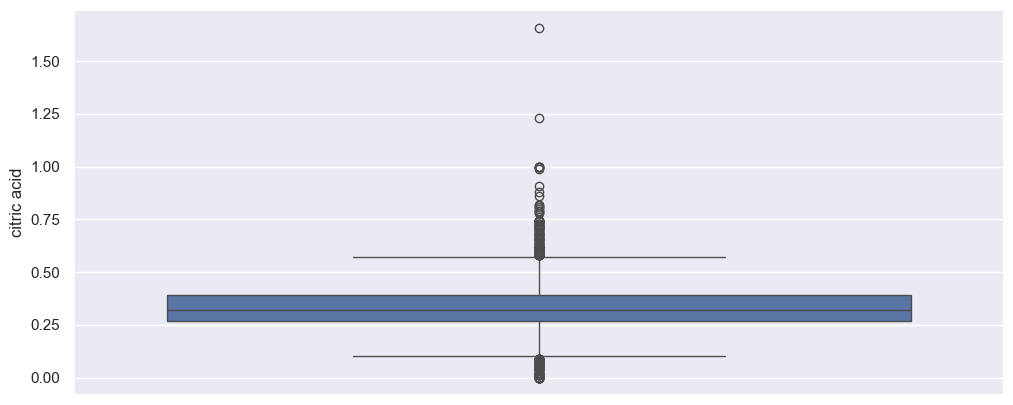

In [245]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['citric acid'])
plt.show()

In [246]:
df_white = df_white.drop(index=df_white[df_white['citric acid'] > 1].index);

Segundo site de Portugal, referencia em fabricação de vinhos, os valores para acido citrico não deve ultrapassar 1 g/litro - https://diariodarepublica.pt/dr/detalhe/portaria/610-1972-690063

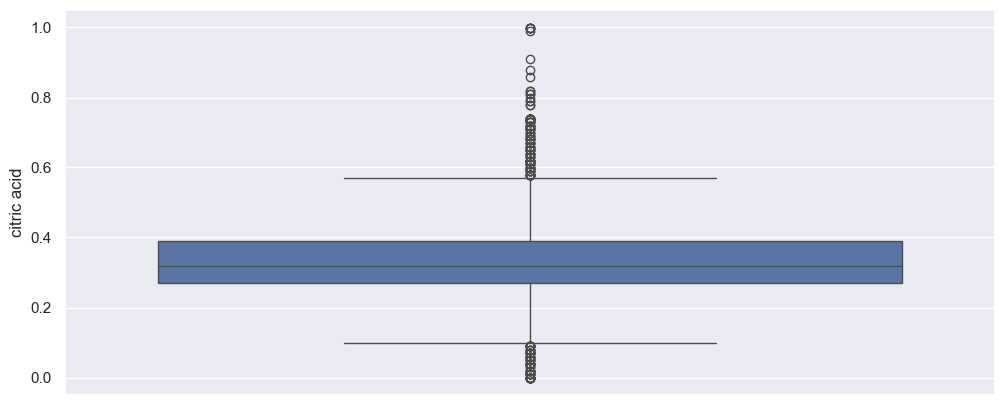

In [247]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['citric acid'])
plt.show()

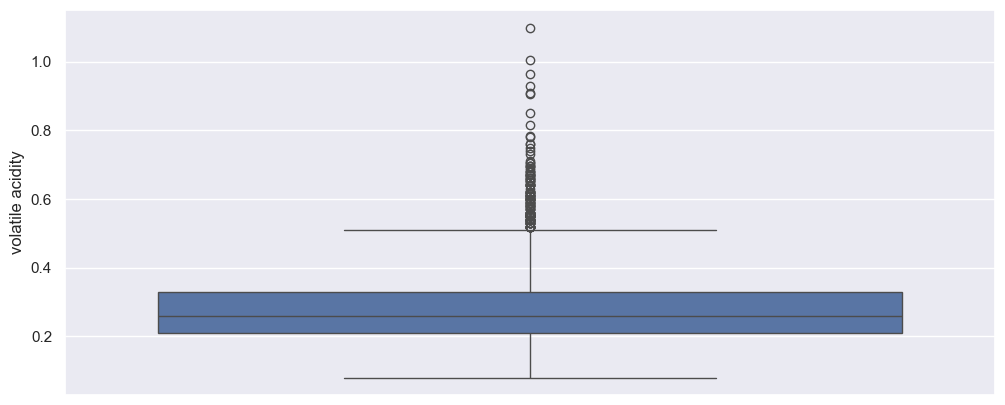

In [248]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['volatile acidity'])
plt.show()

In [263]:
df_white = df_white.drop(index=df_white[df_white['volatile acidity'] > 1.08].index)

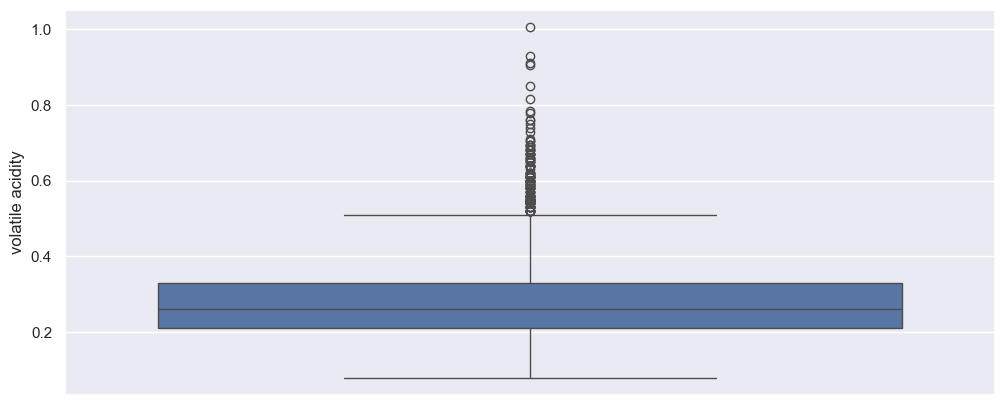

In [264]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['volatile acidity'])
plt.show()

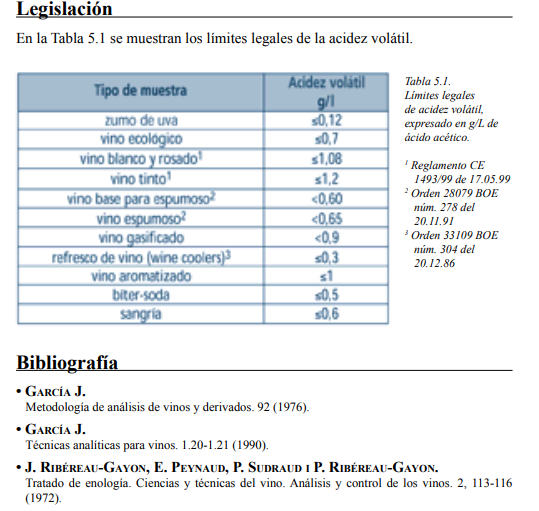

https://laboaragon.com/docs/marcas/panreac/Enologia%20Manual%20de%20Tecnicas.pdf


A acidez volátil está relacionada principalmente à presença de ácidos acético, fórmico e butírico, que permite inferir sobre a sanidade de vinhos. Vinhos com altos teores de acidez volátil indican organimos não desejáveis, particularmente o Acetobacter, estão presentes, e que provavelmente, o vinho pode virar viangre. Portanto, vinhos vinificados corretamente, nos quais foi acrescentados dioxido de enxofre, apresentam baixa acidez volátil (BARROS, 1990; NASCIMENTO, 1995).

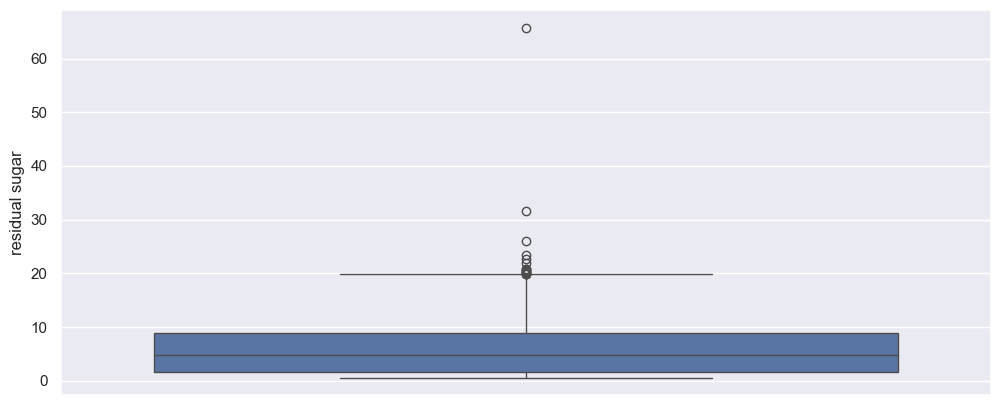

In [251]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['residual sugar'])
plt.show()

In [252]:
df_white = df_white.drop(index=df_white[df_white['residual sugar'] > 19.78].index)

#por default utilizamos a constante para outlier 1.5, porem usarei a constante no valor de 3.0 tratando as variaveis como outlier extremos, (FAVERO, MANUAL DE ANALISE DE DADOS, 53.)

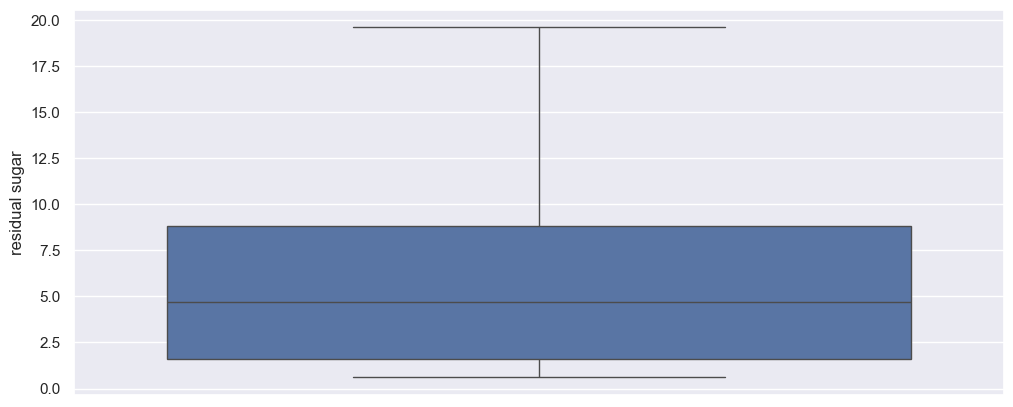

In [253]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['residual sugar'])
plt.show()

BASEADO NA PESQUISA NO SITE, EXISTE INFORMAÇÕES PARA ACIDEZ FIXA MINIMA, O QUE FOR ACIMA SÃO CONSIDERADOS VINHOS DE MELHOR QUALIDADE.

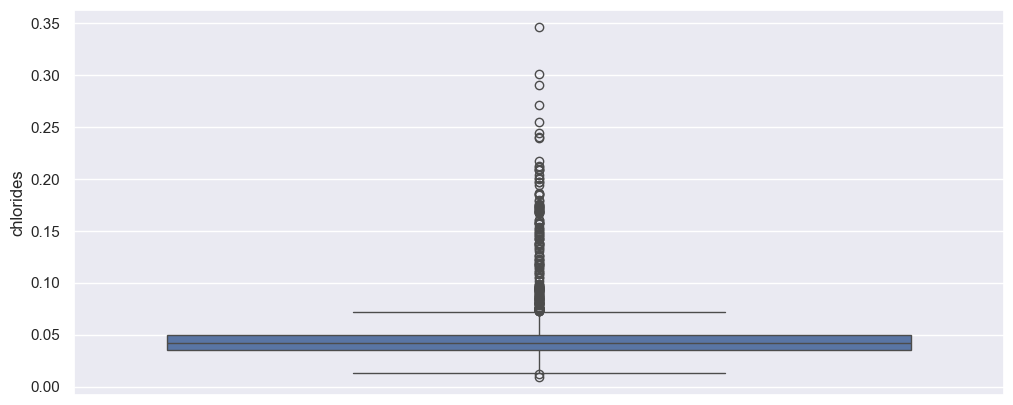

In [254]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['chlorides'])
plt.show()

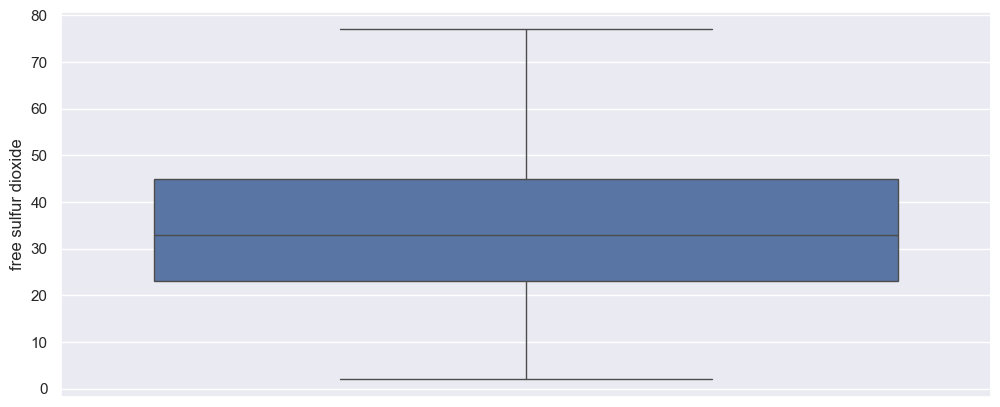

In [267]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['free sulfur dioxide'])
plt.show()

Anidrido sulfuroso livre - não superior a 70 mg por litro, com tolerância de 10 por cento.

In [256]:
df_white = df_white.drop(index=df_white[df_white['free sulfur dioxide'] > 77].index)

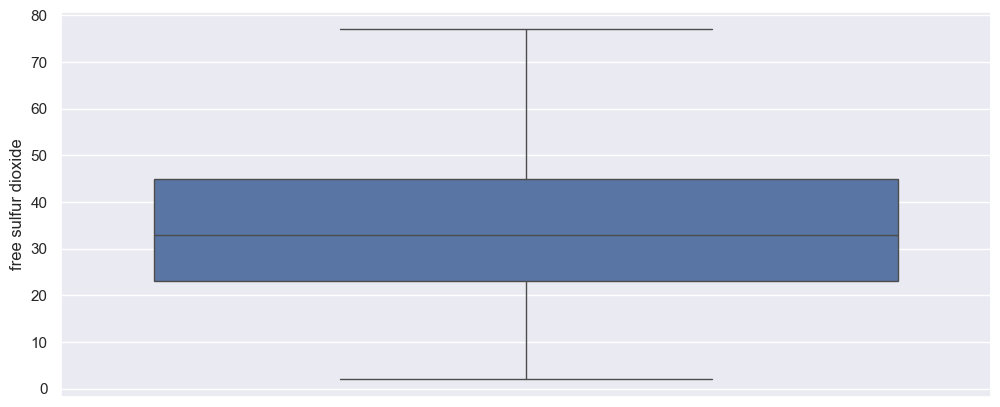

In [268]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['free sulfur dioxide'])
plt.show()

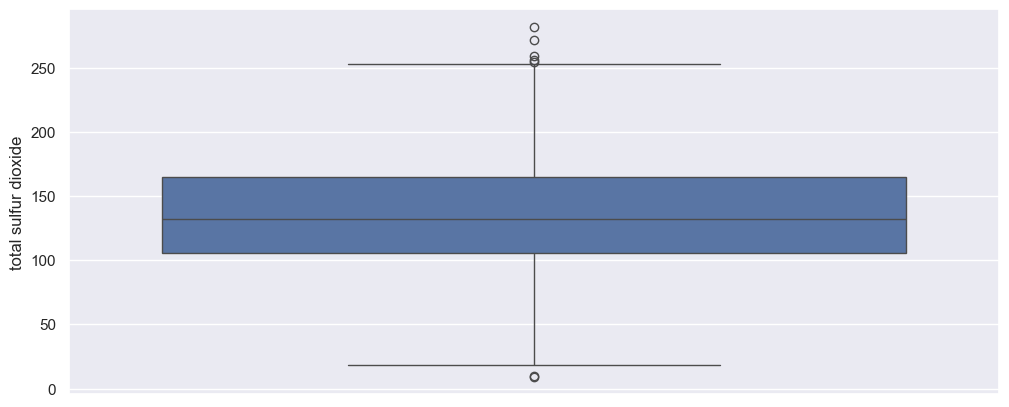

In [266]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['total sulfur dioxide'])
plt.show()

In [258]:
df_white = df_white.drop(index=df_white[df_white['total sulfur dioxide'] > 300].index)

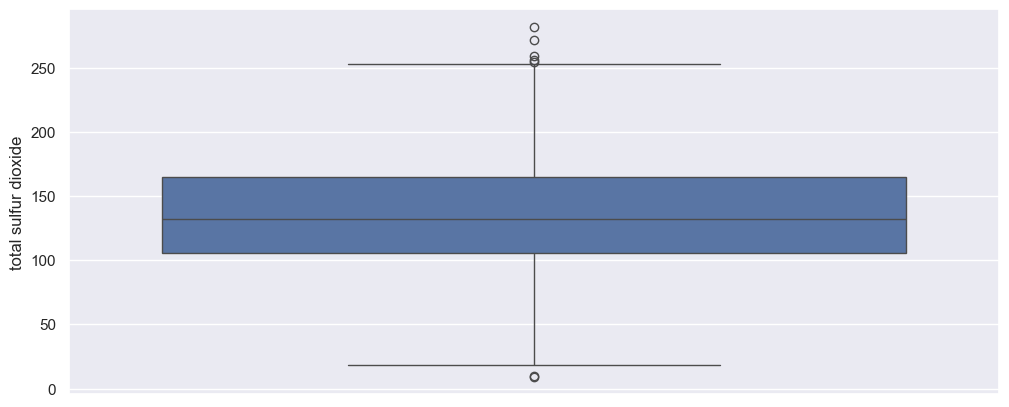

In [259]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['total sulfur dioxide'])
plt.show()

Anidrido sulfuroso total - não superior a 300 mg por litro para os vinhos brancos, 

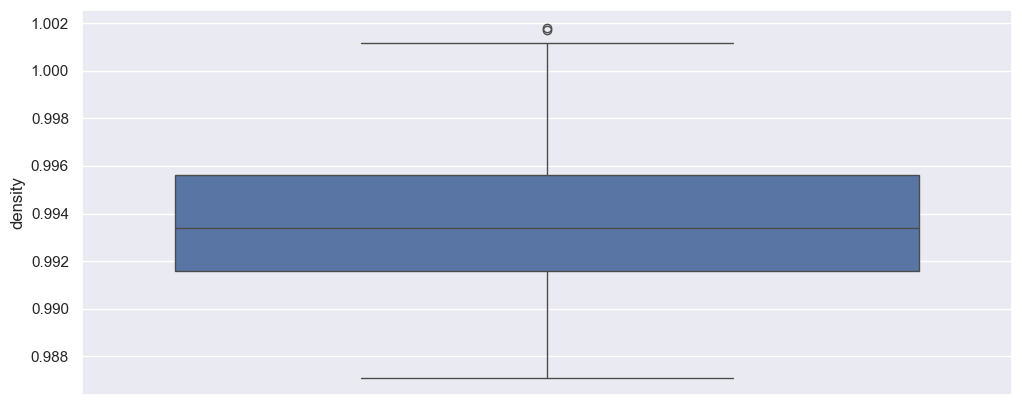

In [260]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['density'])
plt.show()

La densidad relativa a 20 °C se
obtiene multiplicando la masa volúmica por el factor 1,0018. Se expresa con
cuatro decimales y es adimensional.
Los valores habituales de la masa
volúmica a 20 °C para cada tipo de
muestra son:

-Vino blanco seco:
0,9880-0,9930 g/mL.[LINK](https://laboaragon.com/docs/marcas/panreac/Enologia%20Manual%20de%20Tecnicas.pdf)

DIARIO OFICIAL DE LAS COMUNIDADES EUROPEAS.
Reglamento (CEE) N° 2676/90 de la Comisión de 17 de septiembre de 1990 por el que se determinan los métodos de análisis comunitarios aplicables en el sector del vino. 3-14 (1990).

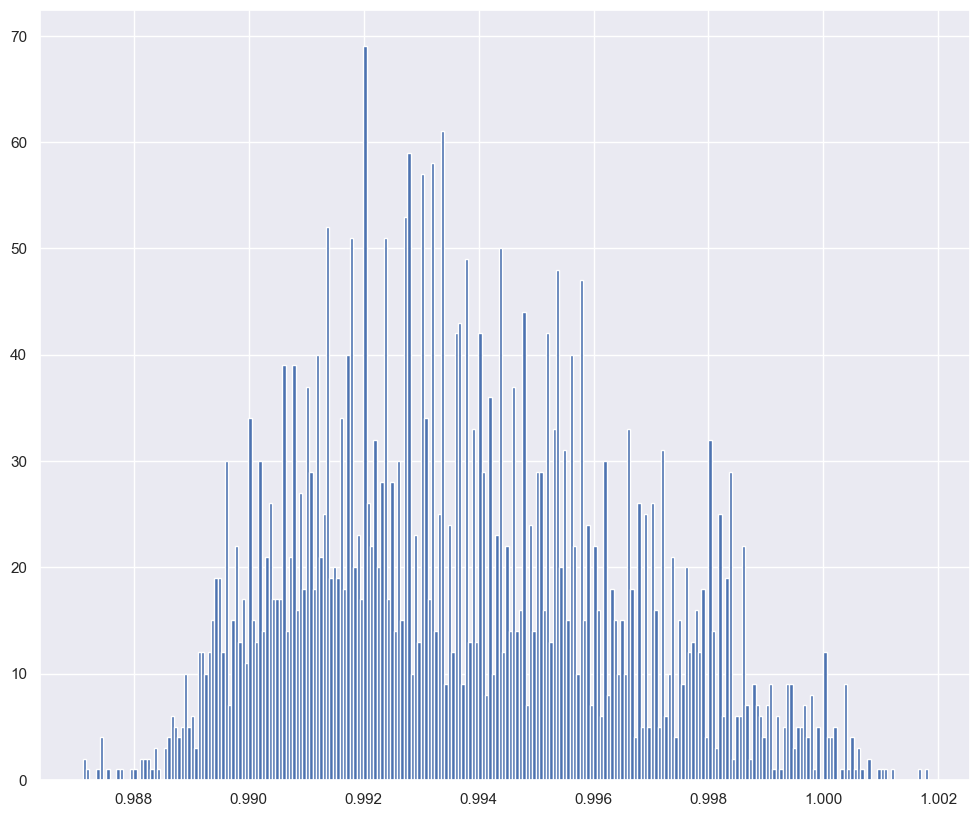

In [261]:
df_white['density'].hist(figsize=(12,10),bins=250);

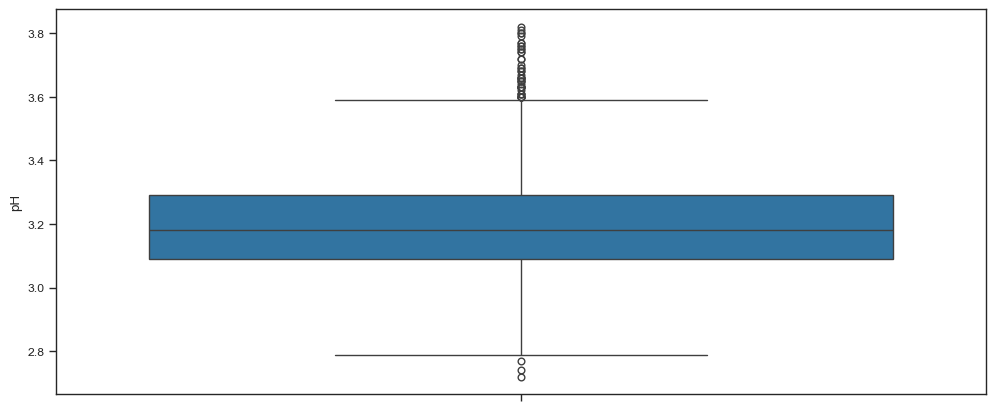

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['pH'])
plt.show()

In [ ]:
df_white = df_white.drop(index=df_white[df_white['pH'] > 3.6].index)

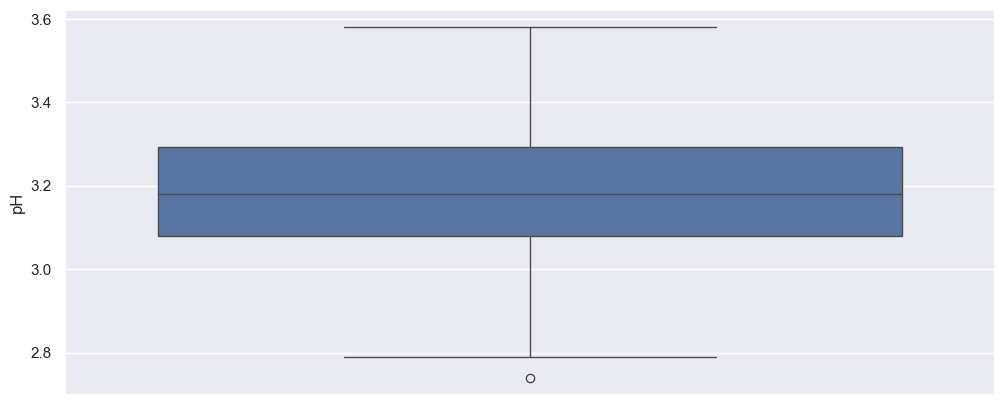

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['pH'])
plt.show()

O pH corresponde à concentração de hidrogênio iônico proveniente dos ácidos orgânicos, além da concentração de potássio, representando a acidez real do vinho (GABAS et al., 1994; RIZZON & MIELE, 2002).

Em condições normais, o pH sofre um aumento numérico durante as diversas etapas de elaboração do vinho. Esse aumento está relacionado com a diminuição dos teores de ácido tartárico em função da precipitação de tartarato ácido de potássio e de tartarato de cálcio, provocado pelo álcool e pela ação física do frio (MANFROI et al.,
2006). Entretanto, principalmente no caso dos vinhos tintos, também é notória uma pequena redução do pH após a conclusão da fermentação malolática.

A avaliação desse parâmetro é importante pelo seu efeito na cor, no sabor e na proporção entre SO2  livre e combinado. Para que o vinho atinja níveis satisfatórios destas características, o pH deve ficar entre 3,1 e 3,6 (AMERINE & OUGH, 1976)[LINK](https://laboaragon.com/docs/marcas/panreac/Enologia%20Manual%20de%20Tecnicas.pdf).

Estes valores são considerados adequados, tendo em vista que os brancos devem possuir um pH mais baixo para preservar o seu frescor característico e favorecer a preservação dos aromas.

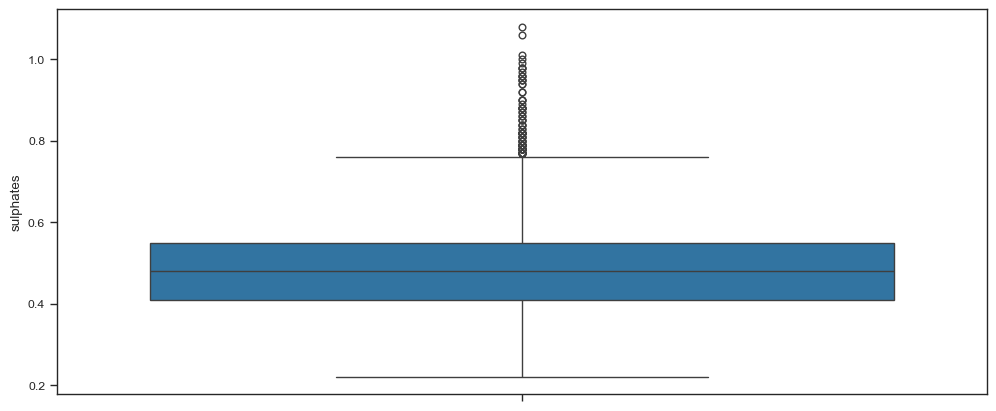

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['sulphates'])
plt.show()

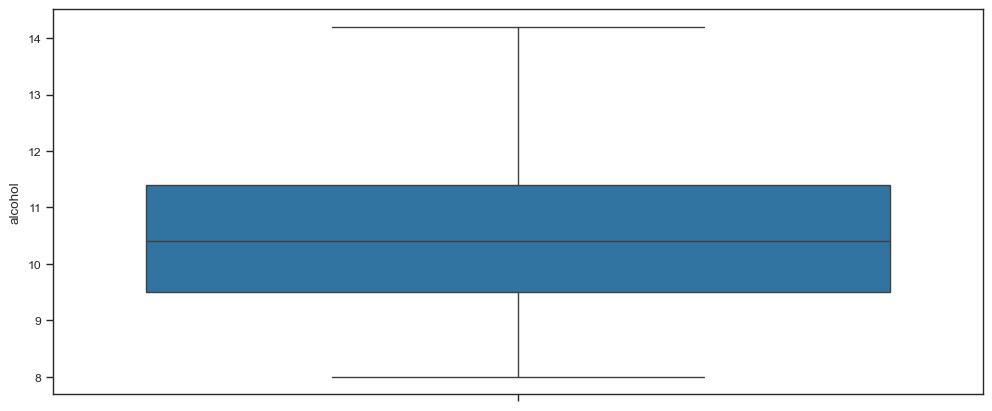

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['alcohol'])
plt.show()

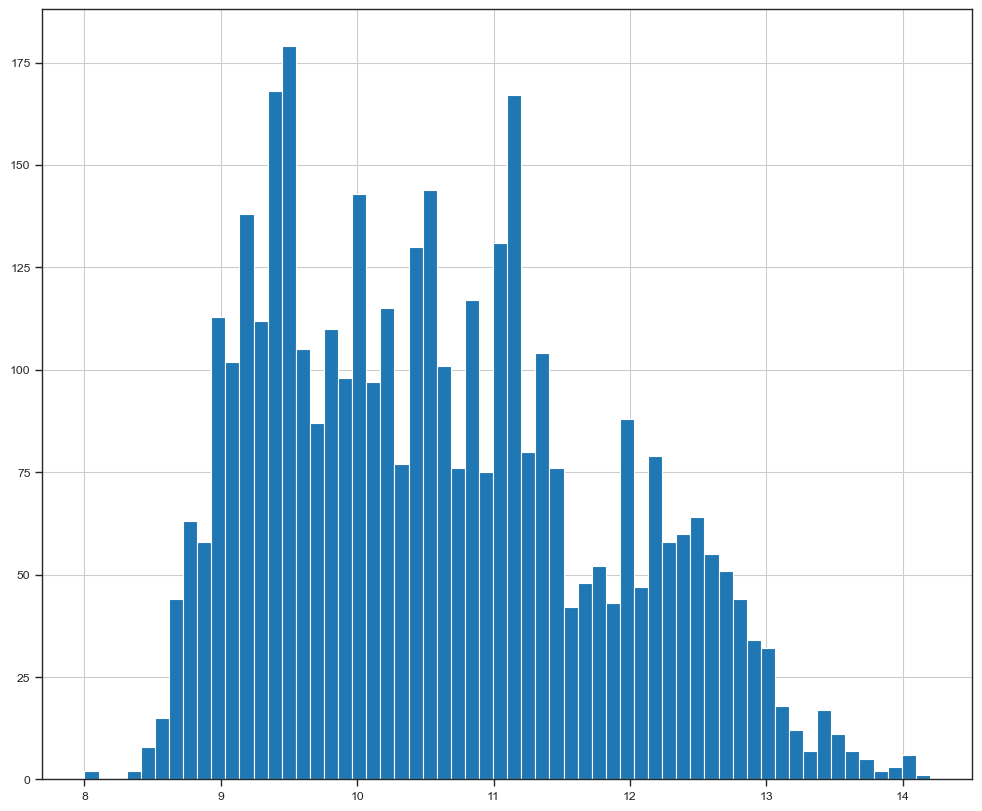

In [ ]:
df_white['alcohol'].hist(figsize=(12,10),bins=60);

In [ ]:
df_white.shape

(432, 12)

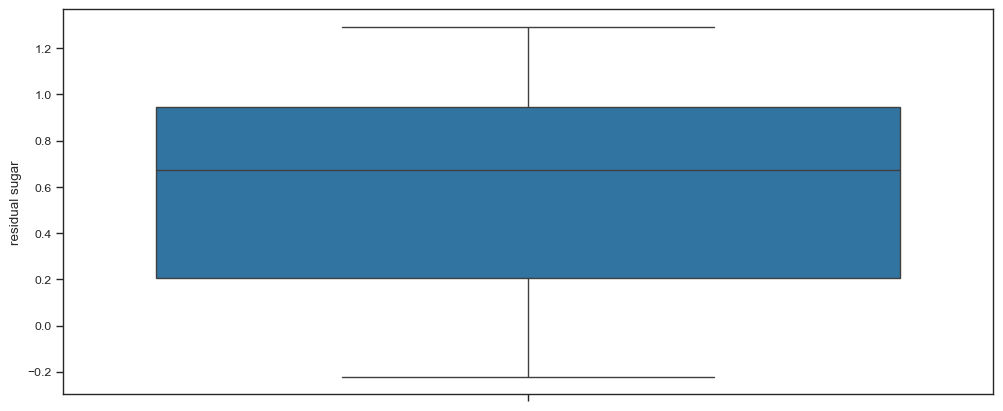

In [ ]:
# para subscrever uma variavel com valor de logaritimo devo fazer desta forma; df_white['residual sugar'] = np.log10(df_white['residual sugar'])
plt.figure(figsize=(12,5))
sns.boxplot(np.log10(df_white['residual sugar']))
plt.show()
#devo escolher essa solução(transformando) 

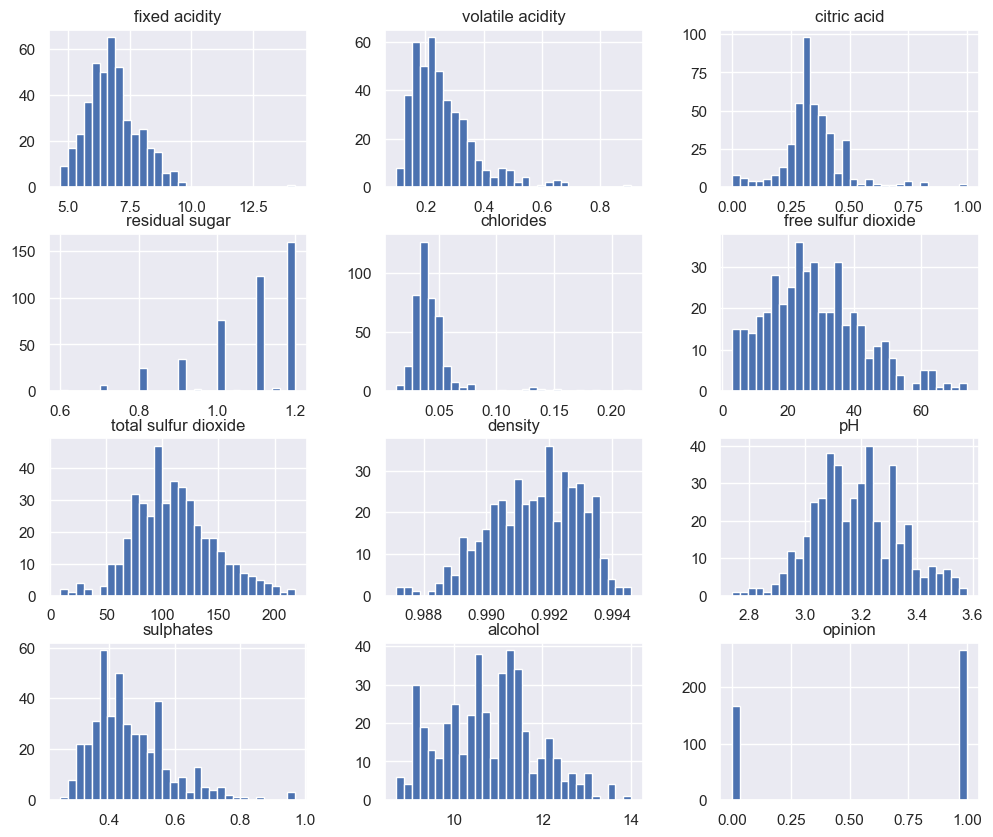

In [ ]:
df_white.hist(figsize=(12,10),bins=30);

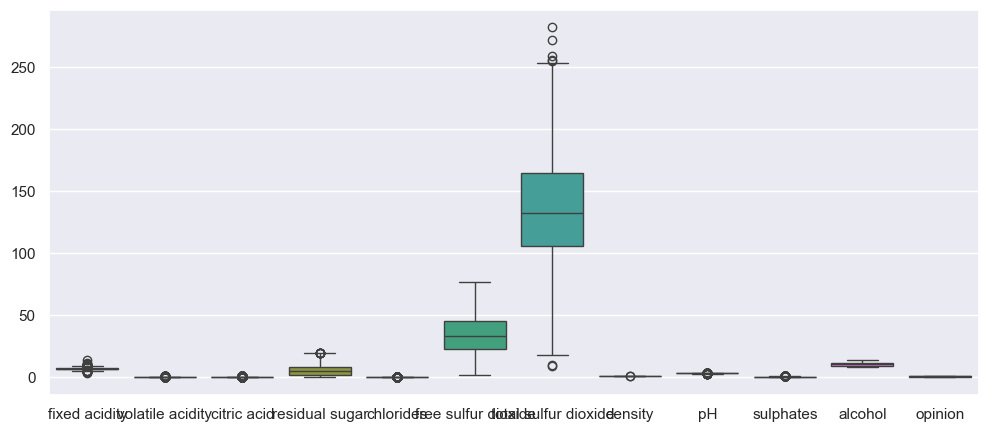

In [269]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white)
plt.show()

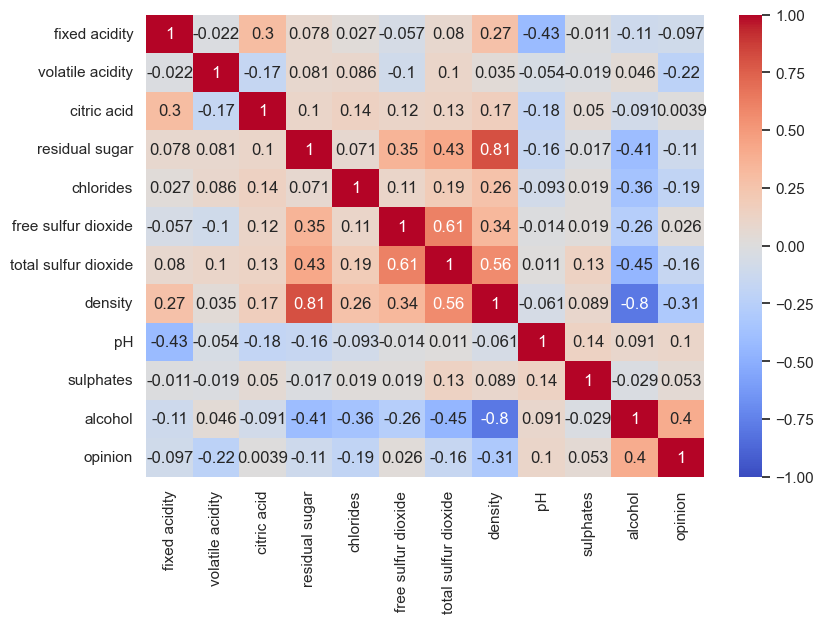

In [284]:
plt.figure(figsize=(9,6))
sns.heatmap(df_white.corr(),annot=True,cmap='coolwarm', vmin= -1, vmax= 1) 
plt.show()

explicar a corelação das variaveis com a sensidade. 

#### 3 - Descreva as variáveis presentes na base. Quais são as variáveis? Quais são os tipos de variáveis (discreta, categórica, contínua)? Quais são as médias e desvios padrões?

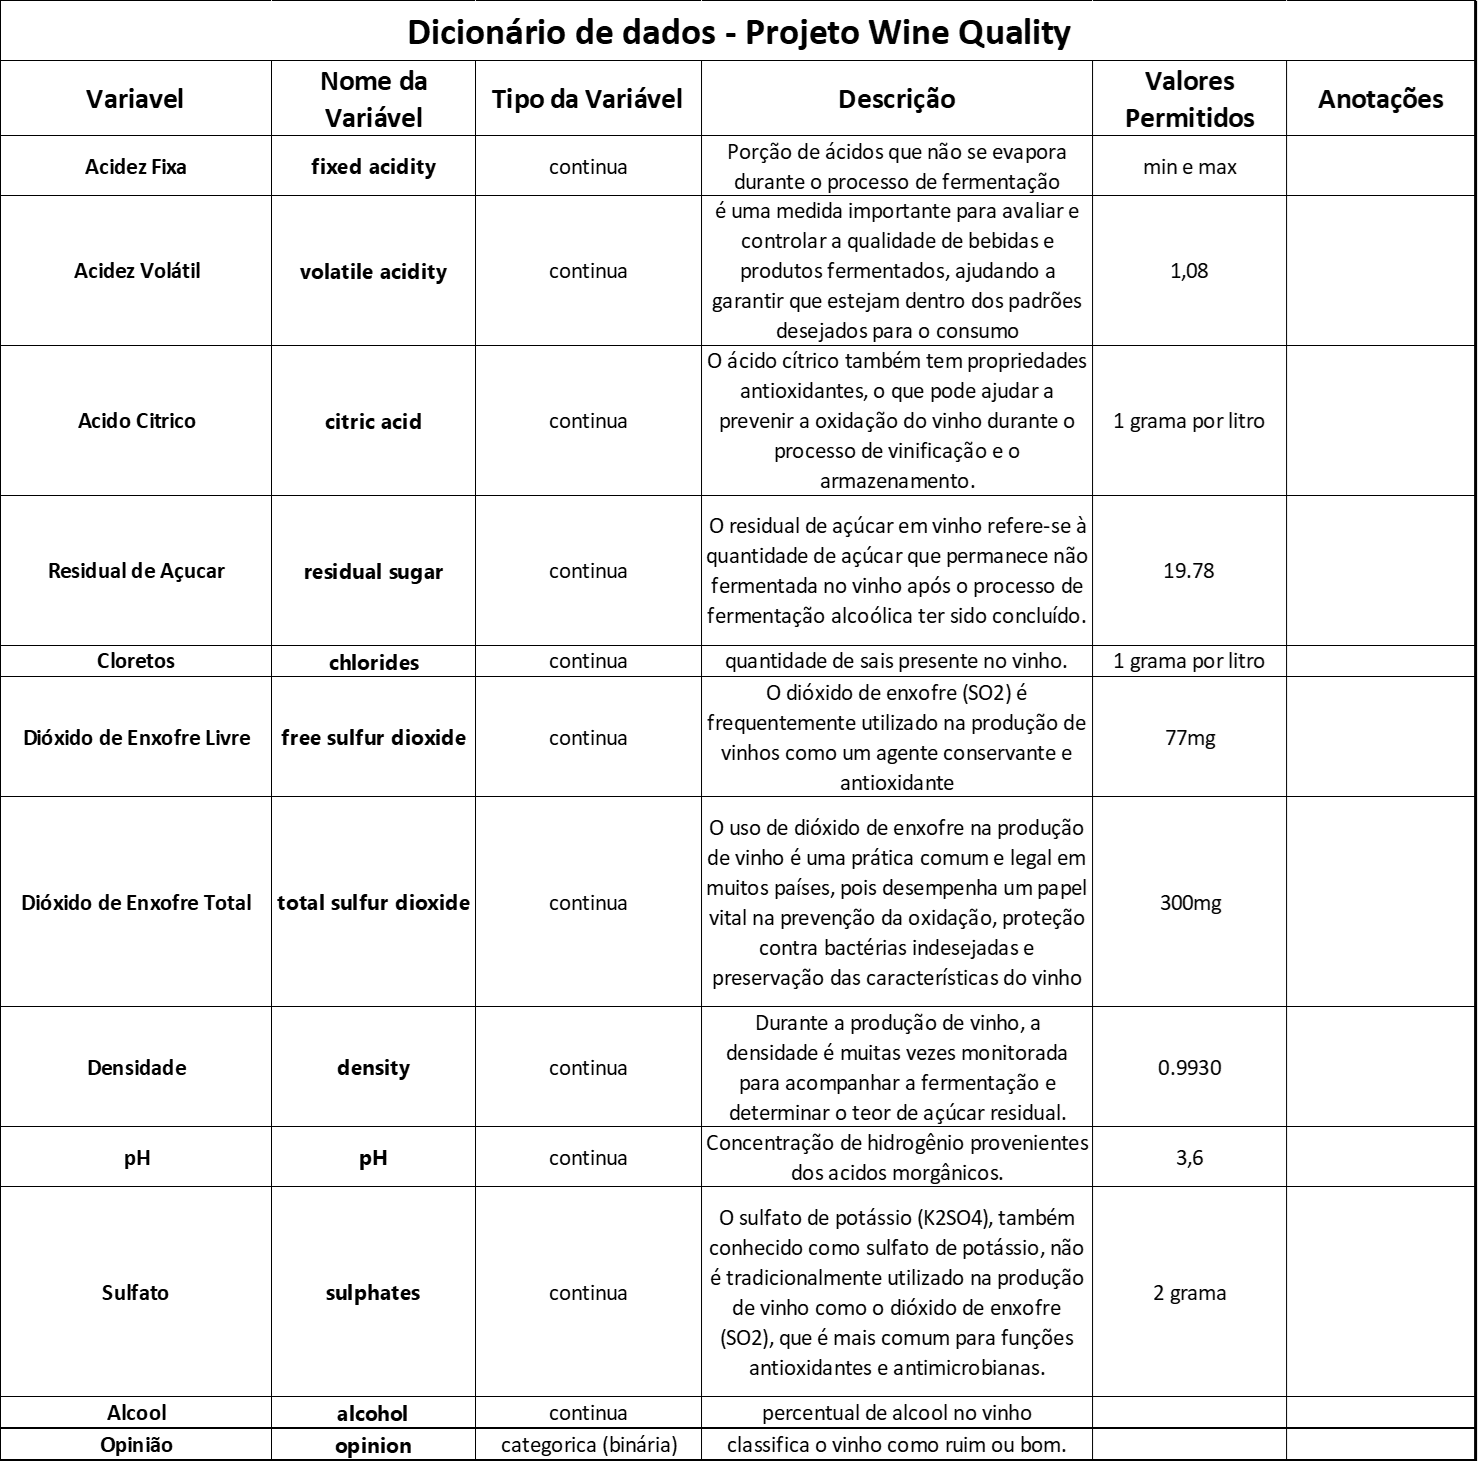

In [271]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
count,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000
mean,6.840370,0.280224,0.333831,5.812254,0.045783,34.078852,136.047311,0.993731,3.195732,0.489648,10.600658,0.661841
std,0.865047,0.101967,0.119385,4.649362,0.022711,15.362249,41.877113,0.002777,0.151226,0.112899,1.217588,0.473144
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991600,3.097500,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,132.000000,0.993400,3.180000,0.480000,10.500000,1.000000
75%,7.300000,0.330000,0.390000,8.700000,0.050000,45.000000,165.000000,0.995640,3.290000,0.550000,11.400000,1.000000
max,14.200000,1.005000,1.000000,19.600000,0.301000,77.000000,282.000000,1.001820,3.820000,1.080000,14.200000,1.000000


STD - No código acima encontramos os std para cada variavel. 

4 - Com a base escolhida:

    a - Descreva as etapas necessárias para criar um modelo de classificação eficiente. 
    etapas do crisp dm https://www.google.com/amp/s/www.escoladnc.com.br/blog/data-science/metodologia-crisp-dm
    


b - b - Treine um modelo de regressão logística usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

i. a média e desvio da acurácia dos modelos obtidos;

ii. a média e desvio da precisão dos modelos obtidos;

iii. a média e desvio da recall dos modelos obtidos;

iv. a média e desvio do f1-score dos modelos obtidos.

**Pré-Processamento de dados**

In [277]:
df_white['opinion']

1       1
2       1
3       1
4       1
5       1
       ..
3937    1
3938    1
3939    0
3940    1
3941    1
Name: opinion, Length: 3868, dtype: int32

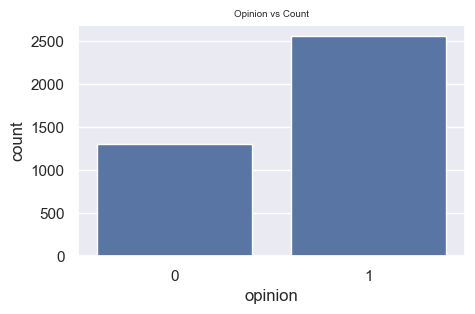

In [281]:
#analisando balaceamento dos dados. 
plt.figure(figsize=(5,3))
sns.set(font_scale=1)
plt.title("Opinion vs Count",fontsize=7)
sns.countplot(x=(df_white['opinion']));

In [282]:
x = df_white.drop(columns='opinion')
y = df_white['opinion']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

A partir daqui devo criar o PIPELINE